In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
df=pd.read_csv(r"customers (1).csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [54]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df1=df.drop(["CustomerID","Gender","Spending Score (1-100)"],axis=1)
df1

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [61]:
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)
df1_scaled


array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

In [62]:
df1_normalize=normalize(df1_scaled)
df1_normalize

array([[-0.63370432, -0.77357536],
       [-0.59309929, -0.80512933],
       [-0.62248674, -0.78263035],
       [-0.5559229 , -0.83123386],
       [-0.32091402, -0.94710833],
       [-0.58819117, -0.80872192],
       [-0.16767707, -0.98584198],
       [-0.57358363, -0.81914701],
       [ 0.75113005, -0.66015427],
       [-0.37169669, -0.92835422],
       [ 0.78650817, -0.61757987],
       [-0.1715942 , -0.98516772],
       [ 0.66387716, -0.74784164],
       [-0.56702759, -0.8236988 ],
       [-0.08544563, -0.99634284],
       [-0.61557289, -0.78807995],
       [-0.17999483, -0.98366756],
       [-0.66727824, -0.74480853],
       [ 0.54983821, -0.83527118],
       [-0.18924436, -0.98193002],
       [-0.19422786, -0.98095644],
       [-0.580156  , -0.81450538],
       [ 0.35362503, -0.93538727],
       [-0.38335383, -0.92360156],
       [ 0.65844229, -0.75263122],
       [-0.49441512, -0.86922591],
       [ 0.33466089, -0.94233863],
       [-0.21702382, -0.97616631],
       [ 0.068352  ,

In [63]:
df_new=pd.DataFrame(df1_scaled)
df_new.columns=['P1','P2']
df_new



,P1,P2
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660
...,...,...
195,-0.276302,2.268791
196,0.441365,2.497807
197,-0.491602,2.497807
198,-0.491602,2.917671


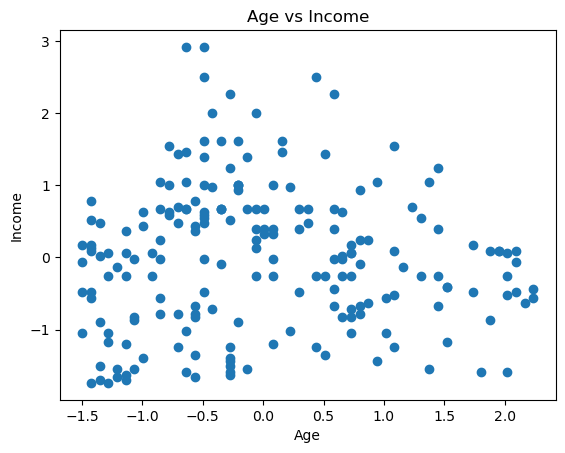

In [66]:
plt.scatter(df_new["P1"],df_new["P2"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()

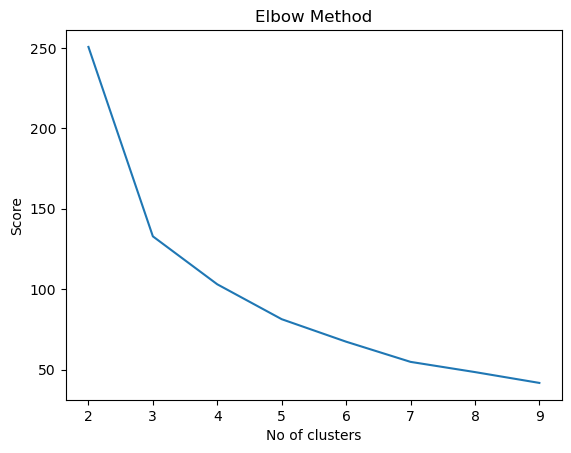

In [67]:
individual_clustering_score=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=300,init="k-means++",random_state=42)
    kmeans.fit(df1_scaled)
    individual_clustering_score.append(kmeans.inertia_)
plt.plot(range(2,10),individual_clustering_score)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("Score")
plt.show()


In [77]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
pred=kmeans.fit_predict(df_new)
pred


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [78]:
df_new["Cluster"]=pd.DataFrame(pred)


In [79]:
df_new

,P1,P2,Cluster
0,-1.424569,-1.738999,0
1,-1.281035,-1.738999,0
2,-1.352802,-1.700830,0
3,-1.137502,-1.700830,0
4,-0.563369,-1.662660,0
...,...,...,...
195,-0.276302,2.268791,2
196,0.441365,2.497807,2
197,-0.491602,2.497807,2
198,-0.491602,2.917671,2


C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


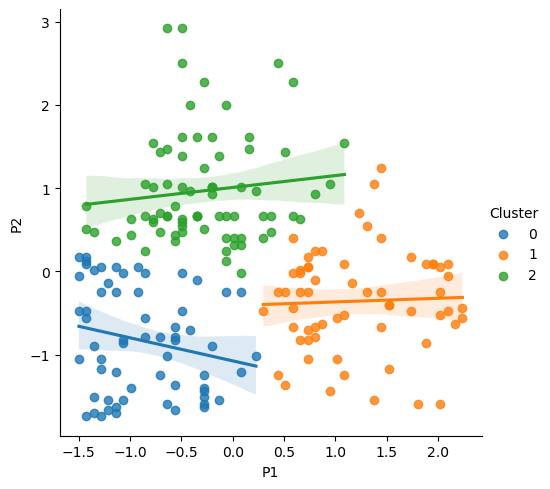

In [80]:
sns.lmplot("P1","P2",data=df_new,hue="Cluster",legend=True)

In [82]:
kmeans.cluster_centers_

array([[-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084],
       [-0.27913465,  0.96851913]])